In [11]:
%matplotlib inline

NameError: name 'matplotlib' is not defined

In [7]:
import torch
import sys
sys.path.insert(0, '../src')  # Adjust the path to the root of the package

from capstone.settings import Cartpole
from capstone.training import Trainer
from capstone.evaluation import Evaluator

from capstone.barriers import NNDM_H
from capstone.cbf import CBF

from capstone.nndm import NNDM
from capstone.dqn import DQN
from capstone.ddpg import Actor

In [12]:
import matplotlib

is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

In [13]:
env = Cartpole()

In [14]:
import os
print(os.getcwd())

C:\Users\ruben\PycharmProjects\Capstone\examples


  0%|          | 0/200 [00:00<?, ?it/s]

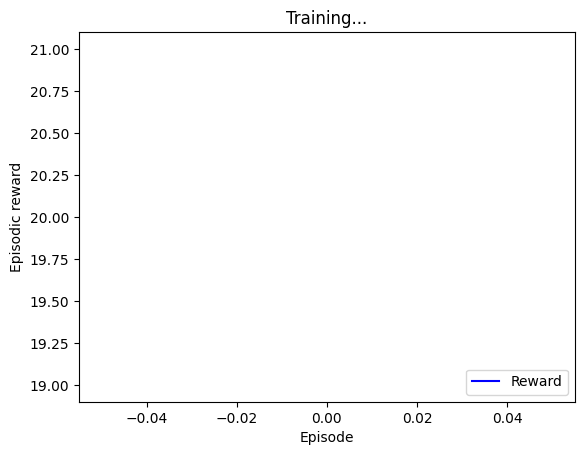

  0%|          | 1/200 [00:00<01:30,  2.20it/s]

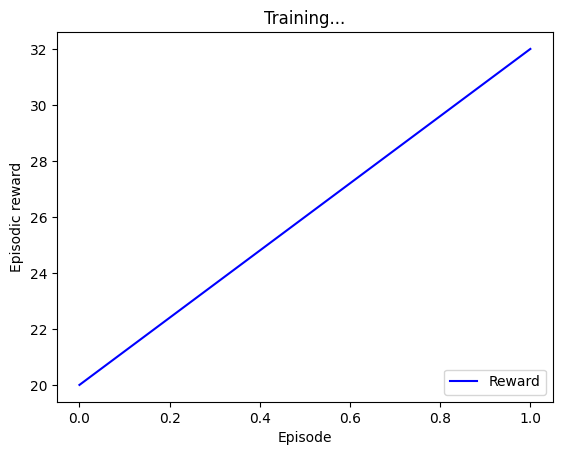

  1%|          | 2/200 [00:00<01:13,  2.68it/s]

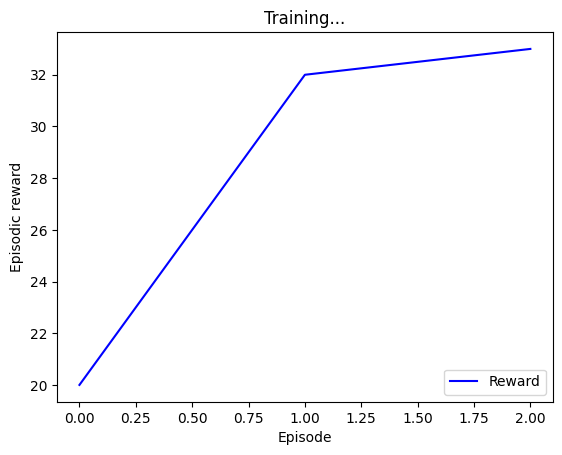

  2%|▏         | 3/200 [00:01<01:06,  2.96it/s]

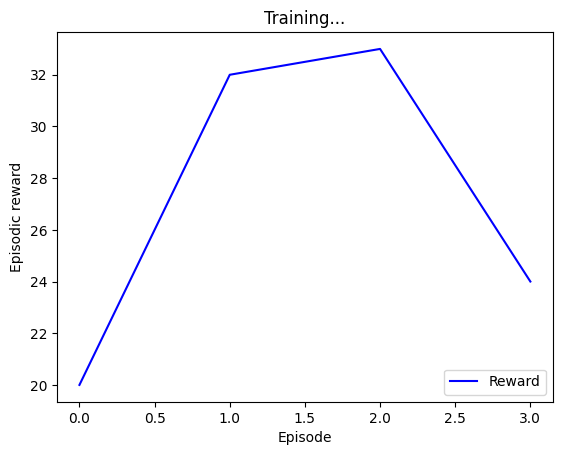

  2%|▏         | 4/200 [00:01<01:03,  3.10it/s]

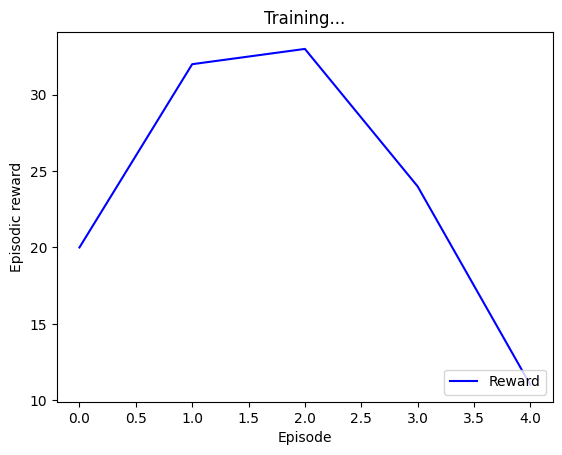

  2%|▎         | 5/200 [00:01<00:58,  3.31it/s]

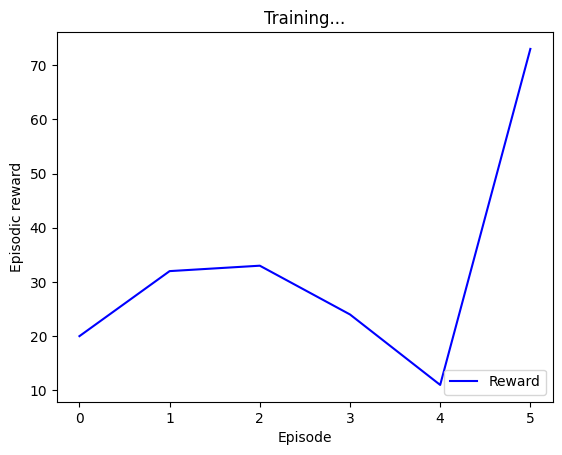

  3%|▎         | 6/200 [00:02<01:22,  2.36it/s]

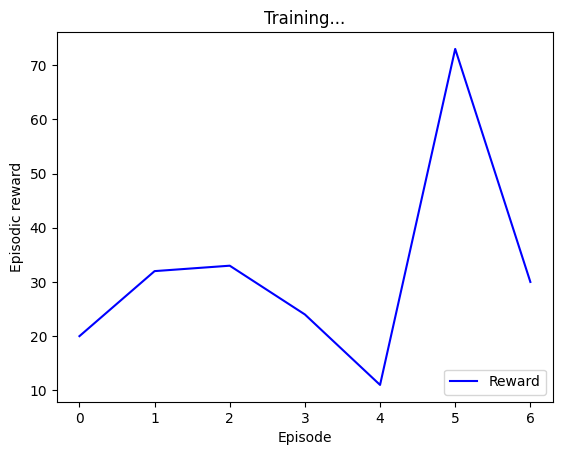

  4%|▎         | 7/200 [00:02<01:19,  2.44it/s]

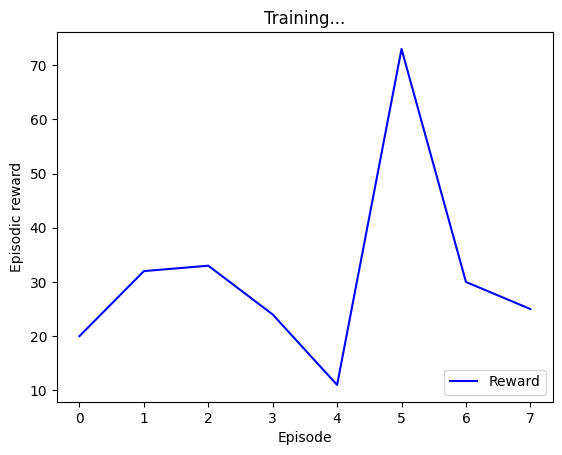

  4%|▍         | 8/200 [00:03<01:17,  2.48it/s]

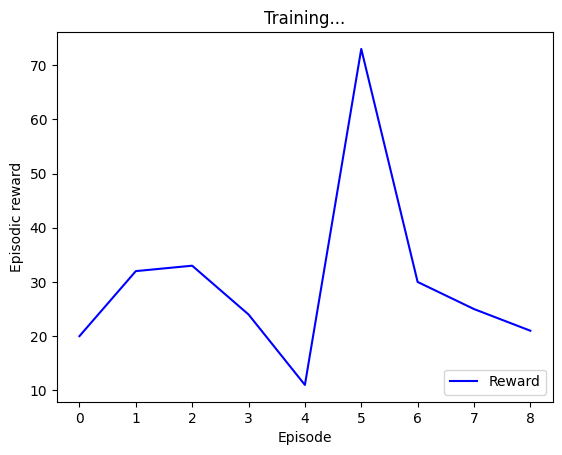

  4%|▍         | 9/200 [00:03<01:14,  2.56it/s]

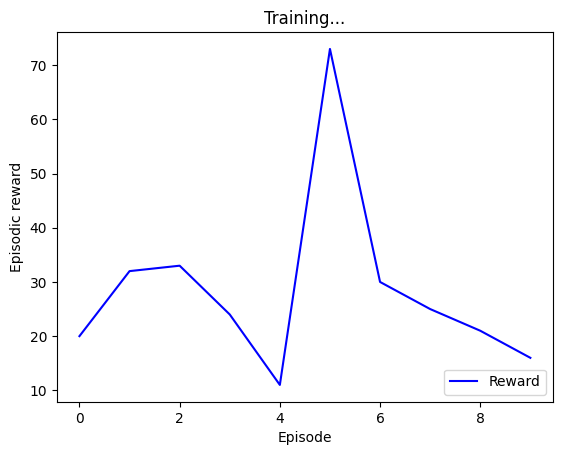

  5%|▌         | 10/200 [00:03<01:09,  2.74it/s]

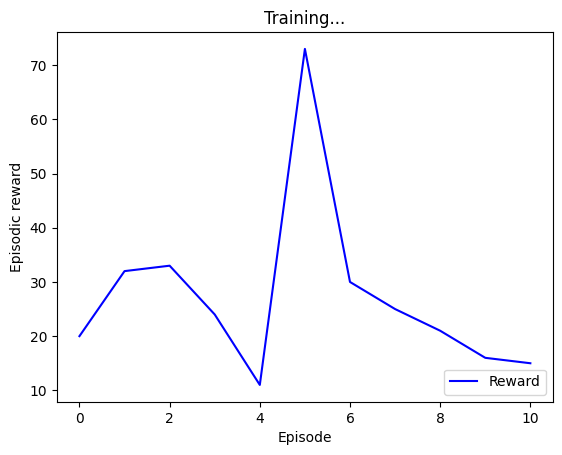

  6%|▌         | 11/200 [00:04<01:08,  2.77it/s]

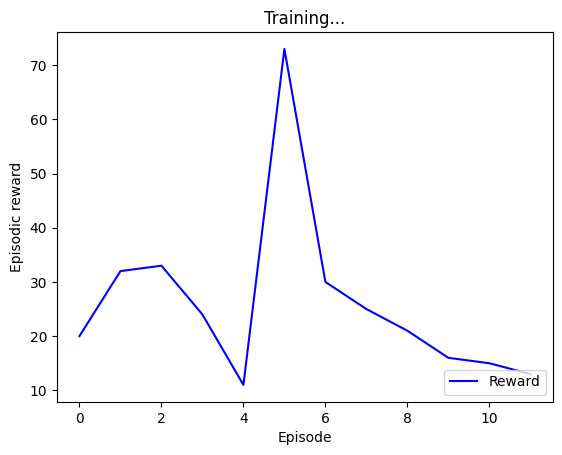

  6%|▌         | 12/200 [00:04<01:06,  2.84it/s]

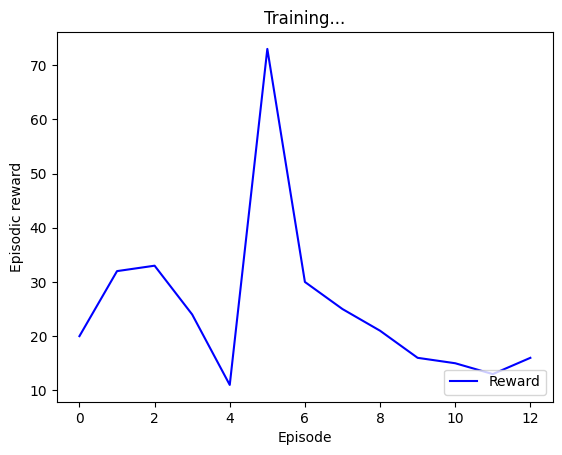

  6%|▋         | 13/200 [00:04<01:10,  2.65it/s]


KeyboardInterrupt: 

In [10]:
pipeline = Trainer(env)
policy, nndm = pipeline.train()

torch.save(policy.state_dict(), f'../Agents/{type(env).__name__}')
torch.save(nndm.state_dict(), f'../NNDMs/{type(env).__name__}')

In [11]:
policy = DQN(env) if env.is_discrete else Actor(env)
policy_params = torch.load(f'../Agents/{type(env).__name__}')
policy.load_state_dict(policy_params)

nndm = NNDM(env)
nndm_params = torch.load(f'../NNDMs/{type(env).__name__}')
nndm.load_state_dict(nndm_params)

evaluator = Evaluator(env)

h = NNDM_H(env, nndm)
cbf = CBF(env, h, policy, alpha=0.9)

evaluator.play(policy)
evaluator.nice_plots(policy, 0.9, 0, 10, 500, 1)